# try both decision trees and random forests for the data set that I randomly make!

In [77]:
chapters = pd.DataFrame()
chapters['amt_read'] = np.random.randint(1, 60, 20)
chapters['verses_per_ch'] = [10, 14, 15, 40, 17, 19, 42, 10, 6, 5,
                                11, 13, 22, 21, 25, 10, 33, 43, 61, 21]
chapters['badge_received'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
chapters['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
chapters['ch_read'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_ch = pd.DataFrame()
repeat_ch['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

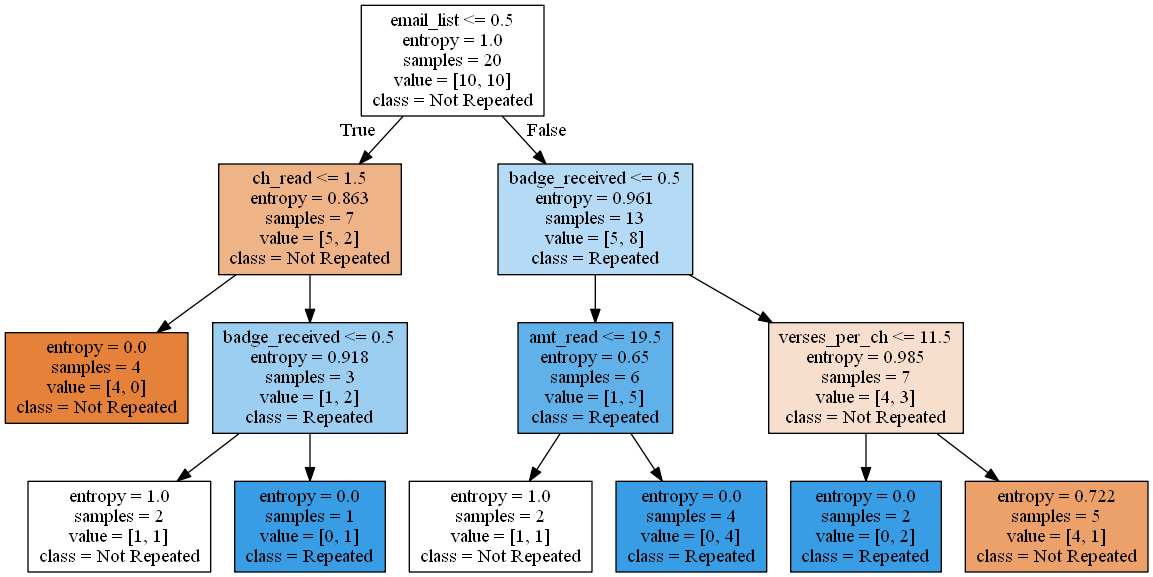

In [80]:
import time
start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
    random_state=42
)
decision_tree.fit(chapters, repeat_ch)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=chapters.columns,
    class_names=['Not Repeated', 'Repeated'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [81]:
end_time = time.time()
tot_time = end_time - start_time
print(tot_time)

0.42400074005126953


In [82]:
#random forest 
start_time = time.time()
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = chapters
Y = chapters['amt_read']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=2)

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


array([0.11111111, 0.        ])

In [83]:
end_time = time.time()
tot_time = end_time - start_time
print(tot_time)

0.37999963760375977


Random forest is faster, but it seems like it's not very consistent in it's accuracy each time I do it.